In [1]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

In [26]:
cvA_file = open('../Inputs/A/COLVAR')
cvB_file = open('../Inputs/B/COLVAR')
time, A_phi, A_psi, B_phi, B_psi = [], [], [], [], []

for line in cvA_file.readlines():
    #print(line)
    if line[0] != '#':
        data = line.strip().split()
        #print(data)
        timestep, phi, psi = float(data[0]), float(data[1]), float(data[2])
        time.append(timestep)
        A_phi.append(phi)
        A_psi.append(psi)
        
for line in cvB_file.readlines():
    if line[0] != '#':
        data = line.strip().split()
        timestep, phi, psi = float(data[0]), float(data[1]), float(data[2])
        B_phi.append(phi)
        B_psi.append(psi)

In [39]:
trajA = md.load_xtc('../Inputs/A/traj_comp.xtc', top='../Inputs/A/confout.gro')
trajB = md.load_xtc('../Inputs/B/traj_comp.xtc', top='../Inputs/B/confout.gro')

(__, A_phi_md) = md.compute_phi(trajA)
(__, A_psi_md) = md.compute_psi(trajA)

(__, B_phi_md) = md.compute_phi(trajB)
(__, B_psi_md) = md.compute_psi(trajB)

#histA, __, __ = np.histogram2d(phi_A.ravel(), psi_A.ravel(), bins=50)
#histB, __, __ = np.histogram2d(phi_B.ravel(), psi_B.ravel(), bins=50)




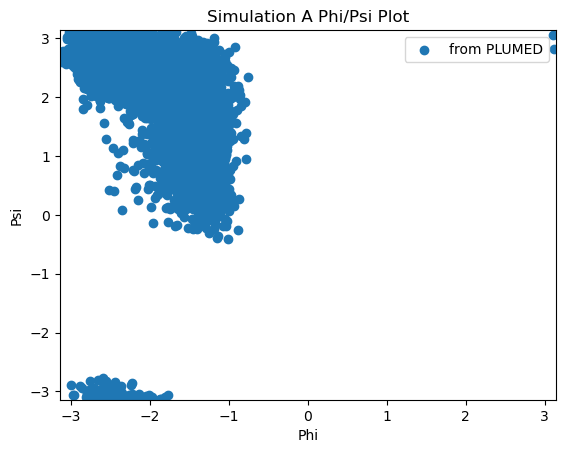

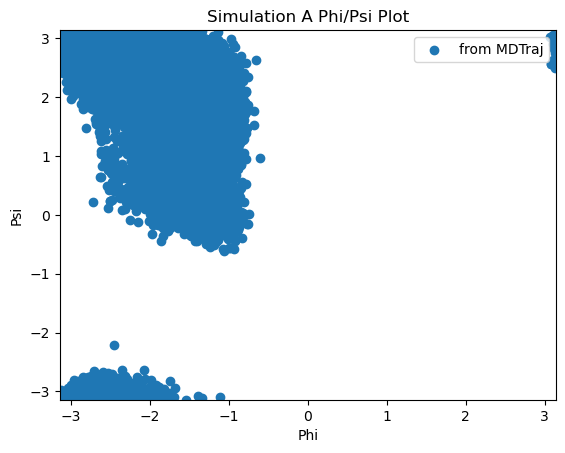

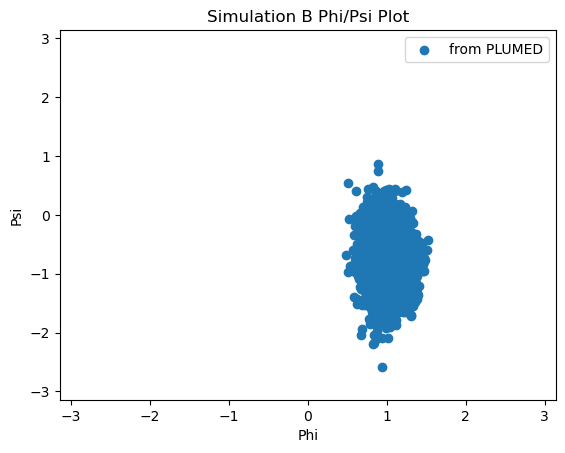

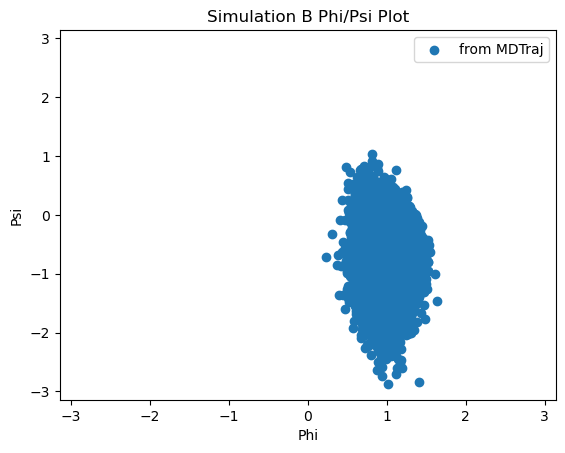

In [44]:
plt.scatter(A_phi, A_psi, label="from PLUMED")
plt.title("Simulation A Phi/Psi Plot")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.legend()
plt.show()

plt.scatter(A_phi_md.ravel(), A_psi_md.ravel(), label="from MDTraj")
plt.title("Simulation A Phi/Psi Plot")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.legend()
plt.show()


plt.scatter(B_phi, B_psi, label="from PLUMED")
plt.title("Simulation B Phi/Psi Plot")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.legend()
plt.show()

plt.scatter(B_phi_md.ravel(), B_psi_md.ravel(), label="from MDTraj")
plt.title("Simulation B Phi/Psi Plot")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.legend()
plt.show()

In [46]:
A_phi_sd = np.std(A_phi)
A_psi_sd = np.std(A_psi)
B_phi_sd = np.std(B_phi)
B_psi_sd = np.std(B_psi)

print(f'A(phi, psi): ({A_phi_sd:.2f}, {A_psi_sd:.2f})')
print(f'B(phi, psi): ({B_phi_sd:.2f}, {B_psi_sd:.2f})')

A(phi, psi): (0.56, 1.03)
B(phi, psi): (0.13, 0.34)
